### Exploring Data:
In this session the first steps to cleaning the data frame in question will be applied. 

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("spambase.csv")

In [6]:
df.head(5)

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,True
2,2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
3,3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,True
4,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,True


In [7]:
df.shape

(4601, 59)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4601 non-null   int64  
 1   word_freq_make              4601 non-null   float64
 2   word_freq_address           4601 non-null   float64
 3   word_freq_all               4595 non-null   float64
 4   word_freq_3d                4599 non-null   float64
 5   word_freq_our               4601 non-null   object 
 6   word_freq_over              4600 non-null   float64
 7   word_freq_remove            4601 non-null   float64
 8   word_freq_internet          4586 non-null   float64
 9   word_freq_order             4601 non-null   float64
 10  word_freq_mail              4601 non-null   float64
 11  word_freq_receive           4601 non-null   float64
 12  word_freq_will              4601 non-null   float64
 13  word_freq_people            4601 

In [9]:
df.dtypes

Unnamed: 0                      int64
word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                  object
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                  object
word_freq_money               float64
word_freq_hp                  float64
word_freq_hp

## - Cleaning data
So far, was applied EDA (Exploratory Data Analysis) codes such as df.head(5), df.shape, df.info, df.types in order to understanding the date size, column names, whether all columns are important or not. 
In this case it was identified that we have 4 types of data being letters, common numbers, numbers with more decimal places and words that later in this project through the formula df[] = df[].astype(int).

(DataScientYst - Data Science Simplified © 2024, 2022)

In [10]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
df.head(1)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.0,0.64,0.64,0.0,0.32,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.778,0.0,0.0,3.756,61,278,True


In [12]:
df.isnull().values.any()

True

In [13]:
df.isnull().sum()

word_freq_make                  0
word_freq_address               0
word_freq_all                   6
word_freq_3d                    2
word_freq_our                   0
word_freq_over                  1
word_freq_remove                0
word_freq_internet             15
word_freq_order                 0
word_freq_mail                  0
word_freq_receive               0
word_freq_will                  0
word_freq_people                0
word_freq_report                0
word_freq_addresses             9
word_freq_free                  0
word_freq_business              0
word_freq_email                 0
word_freq_you                   0
word_freq_credit                0
word_freq_your                  0
word_freq_font                  0
word_freq_000                   0
word_freq_money                 0
word_freq_hp                    0
word_freq_hpl                   0
word_freq_george                0
word_freq_650                   0
word_freq_lab                   0
word_freq_labs

### - Converting non-numeric values
PCA was applied in previous tests in which an error was identified due to a character not accepted by PCA. Due to this, the formula below was applied with the intention of locating values not accepted by the following commands (PCA)
(Pydata.org, 2024)

In [18]:
def to_numeric_or_nan(value) :
    try:
        return pd.to_numeric(value)
    except ValueError:
        return np.nan

In [21]:
df = df.apply(lambda col: col.map(to_numeric_or_nan))

In [22]:
df.fillna(df.mean(), inplace=True)

In [241]:
df["word_freq_000"].unique()

array([0.        , 0.43      , 1.16      , 0.19      , 0.35      ,
       0.7       , 0.31      , 0.05      , 0.48      , 0.3       ,
       0.84      , 0.49      , 1.05      , 1.83      , 0.12      ,
       1.96      , 0.46      , 1.88      , 0.44      , 0.62      ,
       0.72      , 1.28      , 0.59      , 1.38      , 0.6       ,
       0.64      , 0.79      , 1.13      , 0.15      , 0.5       ,
       0.61      , 0.82      , 0.38      , 2.53      , 1.66      ,
       0.34      , 0.78      , 1.02      , 0.23      , 0.53      ,
       0.56      , 1.62      , 1.61      , 0.39      , 1.6       ,
       0.37      , 0.89      , 0.96      , 0.13      , 0.22      ,
       1.12      , 0.95      , 0.08      , 0.06      , 0.8       ,
       0.2       , 1.58      , 0.54      , 0.18      , 0.85      ,
       0.11      , 1.        , 0.25      , 0.36      , 0.63      ,
       0.65      , 0.45      , 1.1       , 1.78      , 0.14      ,
       0.51      , 1.03      , 0.76      , 1.07      , 1.39   

In [23]:
df.dropna(inplace=True)

In [24]:
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

### - Missing Values 

Treating null values from the data frame, applied code df.isnull().sum() to check Null values and df.dropna(inplace=True) to discard null values taught in the class. 

In [30]:
df['is_spam'] = df['is_spam'].astype(int)

In [31]:
df.head(1)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.0,0.64,0.64,0.0,0.32,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.778,0.0,0.0,3.756,61,278,1


In [32]:
df.tail(1)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
4600,0.0,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.125,0.0,0.0,1.25,5,40,0


### - Converting to numeric values
last column converted from "True" and "False" to numeric values "0" and "1" using the code df['is_spam'] = df['is_spam'].astype(int) 

In [29]:
print(df.columns)

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [33]:
df = df.drop(['word_freq_3d', 'word_freq_receive', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_money', 'word_freq_telnet', 'word_freq_857', 'word_freq_415', 'word_freq_parts', 'word_freq_pm',  'word_freq_direct', 'word_freq_cs', 'word_freq_project',  'word_freq_table', 'word_freq_conference', 'word_freq_cs'], axis=1)
df.head(5) 


,word_freq_make,word_freq_address,word_freq_all,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_will,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.32,0.00,0.00,0.00,0.00,0.00,0.64,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.14,0.28,0.21,0.07,0.00,0.94,0.79,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,1.23,0.19,0.19,0.12,0.64,0.25,0.45,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [34]:
df.shape

(4601, 42)

###  - Manual observation

I performed an analysis via excel analyzing the columns that had a value less than 200, so I decided to discard them as I believe they will not be relevant for the analysis. 17 columns were discarded with the intention of reducing the data frame and having a more simplified analysis.
Cod: df = df.drop

In [35]:
df.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_will                float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_george              float64
word_freq_650                 float64
word_freq_lab                 float64
word_freq_labs                float64
word_freq_data                float64
word_freq_85                  float64
word_freq_te

In [101]:
df['is_spam'] = df['is_spam'].astype(int)

In [102]:
df.head(1)

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0,0.0,0.64,0.64,0.0,0.32,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.778,0.0,0.0,3.756,61,278,1


In [103]:
df.tail(1)

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
4600,4600,0.0,0.0,0.65,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.125,0.0,0.0,1.25,5,40,0


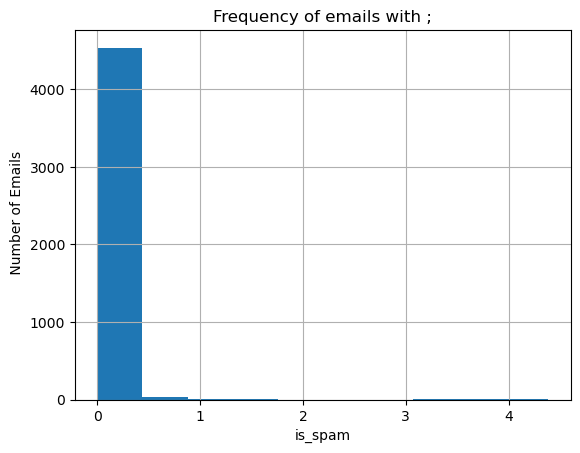

In [104]:
df['char_freq_;'].hist()
plt.xlabel('is_spam')
plt.ylabel(' Number of Emails')
plt.title('Frequency of emails with ;')
plt.show ()

### > Interpretation of the result

This graph shows that email with the symbol ";" For the most part, it is not spam, with 0 being represented as False.

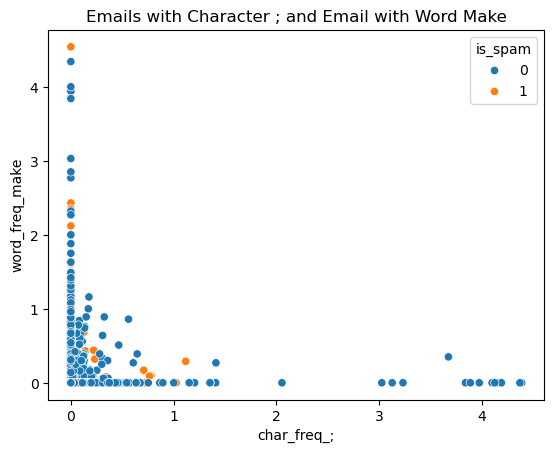

In [105]:
sns.scatterplot(x='char_freq_;', y='word_freq_make', hue='is_spam', data=df)
plt.xlabel('char_freq_;')
plt.ylabel('word_freq_make')
plt.title('Emails with Character ; and Email with Word Make')
plt.show()


### > Interpretation 

In this example, it is indicated that emails with the word Make and emails with the character ";" are indicated as false, that is, they are not considered Spam, the graph also shows us that the frequency of these values is low, being below 1.

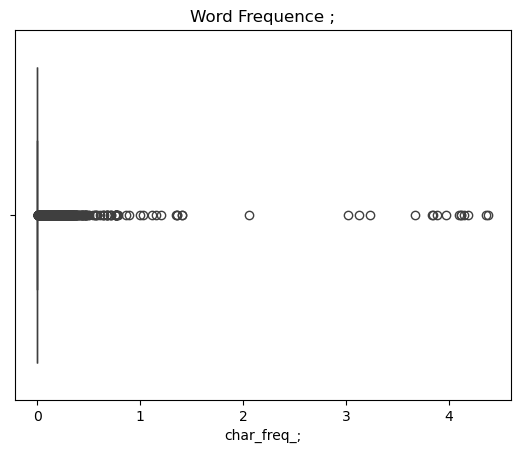

In [106]:
sns.boxplot(x=df['char_freq_;'])
plt.title('Word Frequence ;')
plt.show()

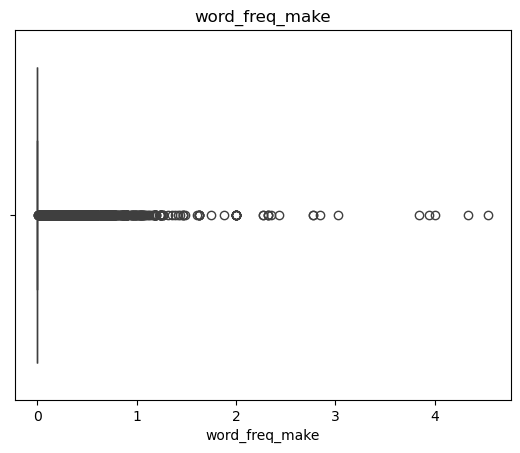

In [133]:
sns.boxplot(x=df['word_freq_make'])
plt.title('word_freq_make')
plt.show()

### Detecting Outliers
In the graphs above, we can identify outliers, that is, data that are outside the data cluster. Identifying ouliers is important as it makes it easier when information from a data frame is used. This function above identifies these points.

In [135]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Unnamed: 0                    2146.000
word_freq_make                   0.000
word_freq_address                0.000
word_freq_all                    0.400
word_freq_3d                     0.000
word_freq_our                    0.360
word_freq_over                   0.000
word_freq_remove                 0.000
word_freq_internet               0.000
word_freq_order                  0.000
word_freq_mail                   0.130
word_freq_receive                0.000
word_freq_will                   0.810
word_freq_people                 0.000
word_freq_report                 0.000
word_freq_addresses              0.000
word_freq_free                   0.060
word_freq_business               0.000
word_freq_email                  0.000
word_freq_you                    2.610
word_freq_credit                 0.000
word_freq_your                   1.240
word_freq_font                   0.000
word_freq_000                    0.000
word_freq_money                  0.000
word_freq_hp             

In [136]:
df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [158]:
df.shape 

(4273, 59)

### Observations:

In this case I applied the formula to detect and remove outliers to try to apply a PCA more efficiently. However, I believe that the removal was not large because the outliers are not that large since most of the values ​​are between 0 and 2 on the scale.

### PCA

Concept: PCA is a technique to facilitate data reading by identifying the main values ​​to be worked on. 
In this case, the emails that accumulate at a specific value show us the accumulated scale of values ​​and which values ​​will be maintained for a more accurate analysis of the data. 
As mentioned on the DataCamp platform, it is like reducing a large photo into a smaller photo without losing the information contained in them (Sharma, 2020).
In this case I believe it is a way of simplifying the Data frame so that it can be viewed in a simplified way in the next techniques.

In [137]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [138]:
df = pd.read_csv('spambase.csv')

In [159]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [160]:
def to_numeric_or_nan(value):
    try:
        return pd.to_numeric(value)
    except ValueError:
        return np.nan

In [161]:
df = df.apply(lambda col: col.map(to_numeric_or_nan))


In [162]:
df.dropna(inplace=True)

In [163]:
if 'is_spam' in df.columns:
    df['is_spam'] = df['is_spam'].astype(int)

In [164]:
if 'is_spam' in df.columns:
    X = df.drop(['is_spam'], axis=1)
    y = df['is_spam']
else:
    X = df

In [165]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [166]:
pca = PCA(n_components=2)
projected = pca.fit_transform(X_scaled)

In [167]:
from sklearn.decomposition import PCA 
pca= PCA(n_components = 2)
pca.fit(X)
PCA(copy=True, n_components=2, whiten=False)

PCA(n_components=2)

In [168]:
print(pca.components_) 

[[ 4.18607729e-05 -5.26047057e-05  6.03372831e-05  5.23128046e-05
   9.07884851e-06  3.91298015e-05 -1.76879486e-06  2.64850070e-05
   1.09611652e-04  8.95984879e-05  3.62797690e-05  2.37768130e-05
   4.70071749e-05  8.55200681e-05  6.65974629e-05  1.04541178e-05
   4.79113366e-05  4.41919103e-05 -2.84129484e-05  6.83570208e-05
   1.00261494e-04  1.73062363e-04  9.22762202e-05  5.60032053e-05
  -1.23432237e-04 -8.95032753e-05 -5.20209152e-04 -5.90538085e-05
  -5.61390799e-05 -4.81761907e-05 -3.03028289e-05 -2.49583137e-05
   5.79039504e-06 -2.36971918e-05 -4.03819211e-05 -3.05695883e-05
  -2.05985994e-06 -5.17004676e-06 -3.64246221e-05 -1.58718460e-05
  -1.52931901e-05 -7.29419196e-05 -1.41981638e-05 -3.96551426e-05
  -1.59267815e-04 -6.76270865e-05  6.03476564e-07 -4.62068998e-06
   2.31470114e-05  6.07976029e-05  9.66945422e-07  5.32576778e-05
   7.80888809e-05  3.08371733e-05  9.74932771e-03  1.63390050e-01
   9.86513138e-01]
 [ 3.03213419e-05  9.83365410e-05  2.42274235e-04  1.0551

In [169]:
print(pca.explained_variance_) 

[388295.01209639  30555.02364014]


In [170]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

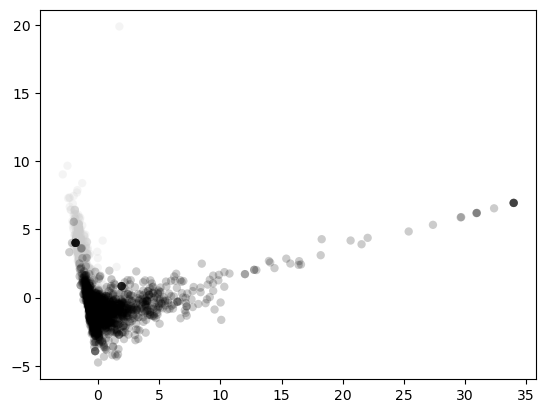

In [171]:
plt.scatter(projected[:, 0], projected[:, 1], alpha=0.2, c=y, edgecolor="none", cmap=plt.get_cmap("nipy_spectral", 10))


In [172]:
pca = PCA(n_components=1) 
pca.fit(X) 
X_pca = pca.transform(X)
print("original shape:   ", X.shape) 
print("transformed shape:", X_pca.shape) 


original shape:    (4273, 57)
transformed shape: (4273, 1)


In [173]:
from sklearn.decomposition import PCA 
pca= PCA(n_components = 2)
pca.fit(X)
PCA(copy=True, n_components=2, whiten=False)

PCA(n_components=2)

In [174]:
print(pca.components_) 

[[ 4.18607729e-05 -5.26047057e-05  6.03372831e-05  5.23128046e-05
   9.07884851e-06  3.91298015e-05 -1.76879486e-06  2.64850070e-05
   1.09611652e-04  8.95984879e-05  3.62797690e-05  2.37768130e-05
   4.70071749e-05  8.55200681e-05  6.65974629e-05  1.04541178e-05
   4.79113366e-05  4.41919103e-05 -2.84129484e-05  6.83570208e-05
   1.00261494e-04  1.73062363e-04  9.22762202e-05  5.60032053e-05
  -1.23432237e-04 -8.95032753e-05 -5.20209152e-04 -5.90538085e-05
  -5.61390799e-05 -4.81761907e-05 -3.03028289e-05 -2.49583137e-05
   5.79039504e-06 -2.36971918e-05 -4.03819211e-05 -3.05695883e-05
  -2.05985994e-06 -5.17004676e-06 -3.64246221e-05 -1.58718460e-05
  -1.52931901e-05 -7.29419196e-05 -1.41981638e-05 -3.96551426e-05
  -1.59267815e-04 -6.76270865e-05  6.03476564e-07 -4.62068998e-06
   2.31470114e-05  6.07976029e-05  9.66945422e-07  5.32576778e-05
   7.80888809e-05  3.08371733e-05  9.74932771e-03  1.63390050e-01
   9.86513138e-01]
 [ 3.03213419e-05  9.83365410e-05  2.42274235e-04  1.0551

In [175]:
print(pca.explained_variance_) 

[388295.01209639  30555.02364014]


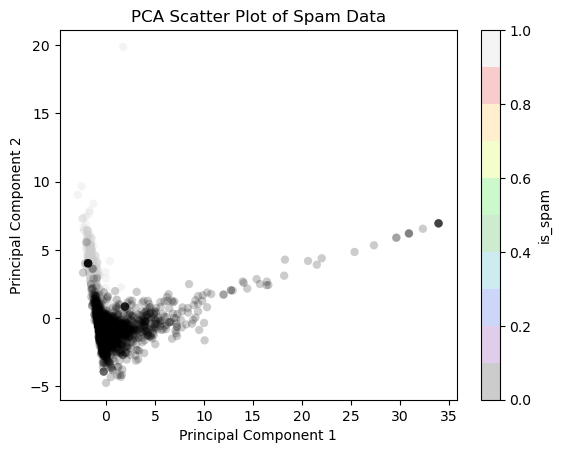

In [176]:
plt.scatter(projected[:, 0], projected[:, 1], alpha=0.2, c=y, edgecolor="none", cmap=plt.get_cmap("nipy_spectral", 10))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='is_spam')
plt.title('PCA Scatter Plot of Spam Data')
plt.show()

### - Final considerations

The graphs above show us that the main data is between -1 and 3 as previously presented, this means that the outliers can be discarded and from here other Machine Learning techniques can be applied.

### References

DataScientYst - Data Science Simplified © 2024 (2022). Exploratory Data Analysis Python and Pandas with Examples. [online] DataScientYst - Data Science Simplified. Available at: https://datascientyst.com/exploratory-data-analysis-pandas-examples/.

Pydata.org. (2024). pandas.to_numeric — pandas 2.2.3 documentation. [online] Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html?form=MG0AV3.

Sharma, A. (2020). Python PCA Tutorial: Principal Component Analysis with Sklearn. [online] www.datacamp.com. Available at: https://www.datacamp.com/tutorial/principal-component-analysis-in-python.

In [ ]:
###GITHUB https://github.com/alexandramuniks/Data-Preparation/blob/main/Final%20Project%20%20Spam%20Base4.ipynb